#A Breakdown of Comp Attendance and Success

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
import pickle
import numpy as np
import pandas as pd
import tbapy

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

In [2]:
event_code = "2017alhu"

In [3]:
tba = tbapy.TBA('w4sdTrGh4f4ueC0pfm5ZceCZp3yM3I0SRsJLrn1oblRowvr3Zx2UbcXQpaWnZSpK')

teams = tba.event_teams(event_code)
i = 0
while i < len(teams):
    teams[i] = teams[i].json
    i+=1

teams = pd.DataFrame(teams)

team_info = []
for i in teams.key:
    team_info.append(tba.team(i).json)
alldata = pd.DataFrame(team_info)
data = alldata

data = data.drop('website', axis=1)
data = data.drop('state_prov', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('nickname', axis=1)
data = data.drop('name', axis=1)
data = data.drop('motto', axis=1)
data = data.drop('location_name', axis=1)
data = data.drop('lng', axis=1)
data = data.drop('lat', axis=1)
data = data.drop('home_championship', axis=1)
data = data.drop('gmaps_url', axis=1)
data = data.drop('gmaps_place_id', axis=1)
data = data.drop('country', axis=1)
data = data.drop('city', axis=1)
data = data.drop('address', axis=1)

data = data.set_index('key')

opr = tba.event_oprs(event_code)
opr = opr.json
opr = pd.DataFrame(opr)


data = data.join(opr)

In [4]:
finals = tba.event_alliances(event_code)
final_picks = []
for i in finals:
    final_picks.append(i.picks)
final_picks = [item for sublist in final_picks for item in sublist]

data['final'] = data.index.isin(final_picks)

In [5]:
team_events = []

for i in data.index:
    events = []
    tb_events = tba.team_events(i)
    for e in tb_events:
        events.append(e.json)
    team_events.append(events)

yearly_events = []
for i in team_events:
    events = []
    for p in i:
        if p['year'] == 2017 and (p['event_type'] == 0 or p['event_type'] == 1):
            events.append(p)
    yearly_events.append(events)
team_events = yearly_events

count = []
for i in team_events:
    count.append(len(i))

data['num_comps'] = count
data['rookie_year'] = 2017 - data['rookie_year']

In [6]:
alabama_data = data
event_code = "2017tnkn"

In [7]:
teams = tba.event_teams(event_code)
i = 0
while i < len(teams):
    teams[i] = teams[i].json
    i+=1

teams = pd.DataFrame(teams)

team_info = []
for i in teams.key:
    team_info.append(tba.team(i).json)
alldata = pd.DataFrame(team_info)
data = alldata

data = data.drop('website', axis=1)
data = data.drop('state_prov', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('nickname', axis=1)
data = data.drop('name', axis=1)
data = data.drop('motto', axis=1)
data = data.drop('location_name', axis=1)
data = data.drop('lng', axis=1)
data = data.drop('lat', axis=1)
data = data.drop('home_championship', axis=1)
data = data.drop('gmaps_url', axis=1)
data = data.drop('gmaps_place_id', axis=1)
data = data.drop('country', axis=1)
data = data.drop('city', axis=1)
data = data.drop('address', axis=1)

data = data.set_index('key')

opr = tba.event_oprs(event_code)
opr = opr.json
opr = pd.DataFrame(opr)


data = data.join(opr)
finals = tba.event_alliances(event_code)
final_picks = []
for i in finals:
    final_picks.append(i.picks)
final_picks = [item for sublist in final_picks for item in sublist]

data['final'] = data.index.isin(final_picks)
team_events = []

for i in data.index:
    events = []
    tb_events = tba.team_events(i)
    for e in tb_events:
        events.append(e.json)
    team_events.append(events)

yearly_events = []
for i in team_events:
    events = []
    for p in i:
        if p['year'] == 2017 and (p['event_type'] == 0 or p['event_type'] == 1):
            events.append(p)
    yearly_events.append(events)
team_events = yearly_events

count = []
for i in team_events:
    count.append(len(i))

data['num_comps'] = count
data['rookie_year'] = 2017 - data['rookie_year']

##Full Data Breakdown of Knoxville Regonal

In [8]:
event = tba.event_matches('2017tnkn')
teams = tba.event_teams('2017tnkn')

rotorspermatch = []
teamstotal = []
teamspermatch = []

finished = []
for i in event:
    if i['score_breakdown']:
         finished.append(i.json)



for i in finished:
    for r in teams:
        for p in i['alliances']['red']['team_keys']:
            if r['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)

    teamstotal.append(teamspermatch)
    score = 0
    if i['score_breakdown']['red']['rotor2Engaged'] : score += 3
    if i['score_breakdown']['red']['rotor3Engaged'] : score += 4
    if i['score_breakdown']['red']['rotor4Engaged'] : score += 7

    rotorspermatch.append([score])
    teamspermatch = []

    for b in teams:
        for p in i['alliances']['blue']['team_keys']:
            if b['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)
    teamstotal.append(teamspermatch)
    teamspermatch = []

    score = 0
    if i['score_breakdown']['blue']['rotor2Engaged'] : score += 3
    if i['score_breakdown']['blue']['rotor3Engaged'] : score += 4
    if i['score_breakdown']['blue']['rotor4Engaged'] : score += 7

    rotorspermatch.append([score])

right = np.matrix(rotorspermatch)
left = np.matrix(teamstotal)
x,resid,rank,s = np.linalg.lstsq(left,right)
num = 0
end_array = []
while num < len(teams):
    end_array.append([teams[num]["key"], float(x[num])+1])
    num += 1
end_array = pd.DataFrame(end_array)
end_array.columns = ['key', 'gears']
end_array = end_array.set_index('key')
data = data.join(end_array)

In [9]:
event = tba.event_matches('2017tnkn')
teams = tba.event_teams('2017tnkn')

rotorspermatch = []
teamstotal = []
teamspermatch = []

finished = []
for i in event:
    if i['score_breakdown']:
         finished.append(i)



for i in finished:
    for r in teams:
        for p in i['alliances']['red']['team_keys']:
            if r['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)

    teamstotal.append(teamspermatch)
    score = 0
    if i['score_breakdown']['red']['touchpadFar'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['red']['touchpadMiddle'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['red']['touchpadNear'] == "ReadyForTakeoff" : score += 1

    rotorspermatch.append([score])
    teamspermatch = []

    for b in teams:
        for p in i['alliances']['blue']['team_keys']:
            if b['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)
    teamstotal.append(teamspermatch)
    teamspermatch = []

    score = 0
    if i['score_breakdown']['blue']['touchpadFar'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['blue']['touchpadMiddle'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['blue']['touchpadNear'] == "ReadyForTakeoff" : score += 1


    rotorspermatch.append([score])

right = np.matrix(rotorspermatch)
left = np.matrix(teamstotal)
#print(left.shape)
#print(right.shape)
x,resid,rank,s = np.linalg.lstsq(left,right)
num = 0
    
end_array = []
while num < len(teams):
    end_array.append([teams[num]["key"], float(x[num])+1])
    num += 1
end_array = pd.DataFrame(end_array)
end_array.columns = ['key', 'rope']
end_array = end_array.set_index('key')
#end_array
data = data.join(end_array)

In [10]:
data

,rookie_year,team_number,ccwms,dprs,oprs,final,num_comps,gears,rope
key,,,,,,,,,
frc108,22,108,34.406191,54.900779,89.306969,True,2,2.857260,1.790512
frc1287,13,1287,24.375298,73.834942,98.210240,True,2,2.328522,2.059382
frc1466,13,1466,40.304779,59.590579,99.895359,True,2,3.008531,1.936805
frc1876,11,1876,60.811768,46.726476,107.538244,True,2,3.334700,1.746903
frc2393,9,2393,49.066346,53.051534,102.117880,True,2,4.946336,1.708704
frc2641,9,2641,57.021615,62.871190,119.892805,True,3,3.637548,1.941543
frc279,18,279,-3.062326,88.030324,84.967998,False,2,2.999452,1.761172
frc3000,8,3000,18.013532,87.087084,105.100616,True,1,4.286491,1.899947
frc3140,7,3140,1.594756,105.563825,107.158582,True,2,2.276788,2.003893


##A Breakdown of Main Stats

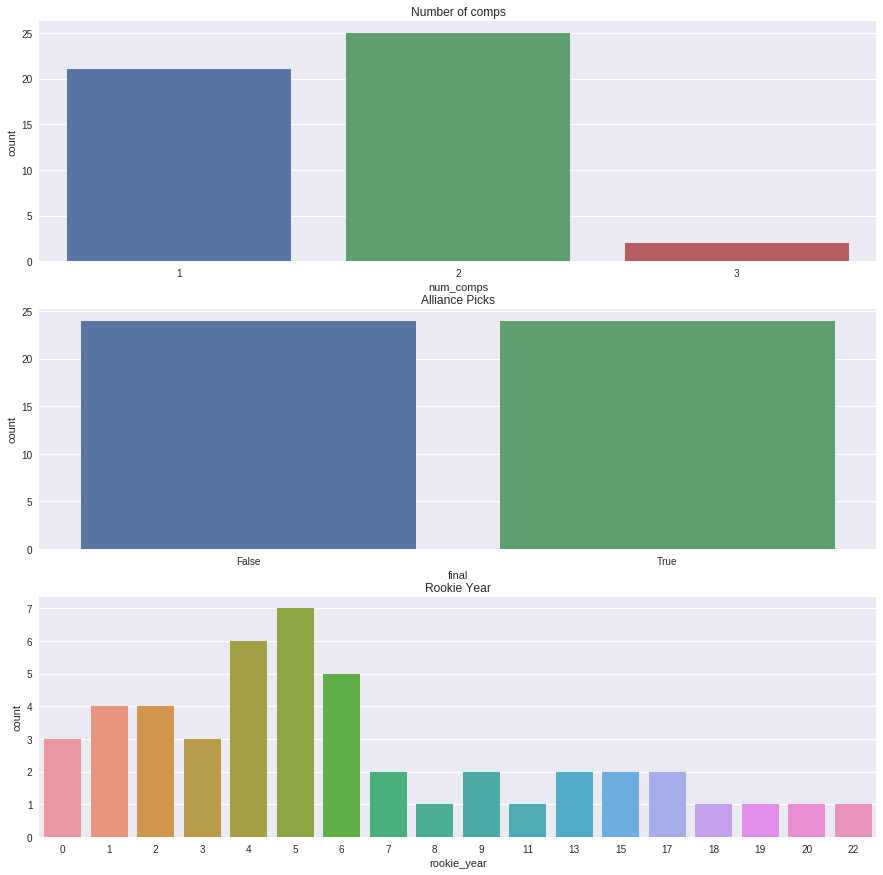

In [11]:
#ax = plt.axes()

f, axarr = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='num_comps', data=data, ax=axarr[0])
sns.countplot(x='final', data=data, ax=axarr[1])
sns.countplot(x='rookie_year', data=data, ax=axarr[2])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Alliance Picks')
axarr[2].set_title('Rookie Year')


#plt.tight_layout()
plt.show()

##All Stat Correlation
Notice: rookie_year and num_comps should be considered cause, and oprs, dprs, ccwms, and alliance picks should be considered Effect

Also: When the X and Y labels of a plot are the same it just does a distribution chart like above

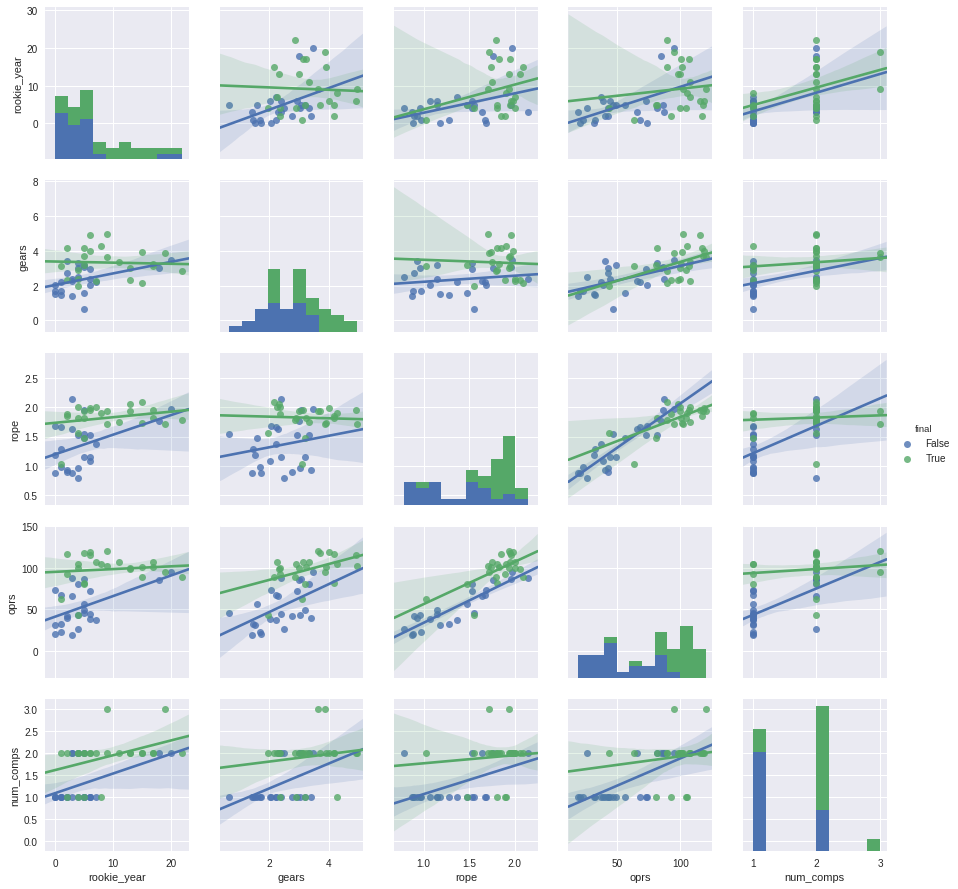

In [12]:
sns.pairplot(data, vars=['rookie_year', 'gears', 'rope', 'oprs', 'num_comps'], hue='final', kind="reg")
plt.show()

##Full Data Breakdown of Alabama Regonal

In [13]:
event = tba.event_matches('2017alhu')
teams = tba.event_teams('2017alhu')

rotorspermatch = []
teamstotal = []
teamspermatch = []

finished = []
for i in event:
    if i['score_breakdown']:
         finished.append(i.json)



for i in finished:
    for r in teams:
        for p in i['alliances']['red']['team_keys']:
            if r['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)

    teamstotal.append(teamspermatch)
    score = 0
    if i['score_breakdown']['red']['rotor2Engaged'] : score += 3
    if i['score_breakdown']['red']['rotor3Engaged'] : score += 4
    if i['score_breakdown']['red']['rotor4Engaged'] : score += 7

    rotorspermatch.append([score])
    teamspermatch = []

    for b in teams:
        for p in i['alliances']['blue']['team_keys']:
            if b['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)
    teamstotal.append(teamspermatch)
    teamspermatch = []

    score = 0
    if i['score_breakdown']['blue']['rotor2Engaged'] : score += 3
    if i['score_breakdown']['blue']['rotor3Engaged'] : score += 4
    if i['score_breakdown']['blue']['rotor4Engaged'] : score += 7

    rotorspermatch.append([score])

right = np.matrix(rotorspermatch)
left = np.matrix(teamstotal)
x,resid,rank,s = np.linalg.lstsq(left,right)
num = 0
end_array = []
while num < len(teams):
    end_array.append([teams[num]["key"], float(x[num])+1])
    num += 1
end_array = pd.DataFrame(end_array)
end_array.columns = ['key', 'gears']
end_array = end_array.set_index('key')
alabama_data = alabama_data.join(end_array)

In [14]:
event = tba.event_matches('2017alhu')
teams = tba.event_teams('2017alhu')

rotorspermatch = []
teamstotal = []
teamspermatch = []

finished = []
for i in event:
    if i['score_breakdown']:
         finished.append(i)



for i in finished:
    for r in teams:
        for p in i['alliances']['red']['team_keys']:
            if r['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)

    teamstotal.append(teamspermatch)
    score = 0
    if i['score_breakdown']['red']['touchpadFar'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['red']['touchpadMiddle'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['red']['touchpadNear'] == "ReadyForTakeoff" : score += 1

    rotorspermatch.append([score])
    teamspermatch = []

    for b in teams:
        for p in i['alliances']['blue']['team_keys']:
            if b['key'] == p:
                teamspermatch.append(1)
                break
        else:
            teamspermatch.append(0)
    teamstotal.append(teamspermatch)
    teamspermatch = []

    score = 0
    if i['score_breakdown']['blue']['touchpadFar'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['blue']['touchpadMiddle'] == "ReadyForTakeoff" : score += 1
    if i['score_breakdown']['blue']['touchpadNear'] == "ReadyForTakeoff" : score += 1


    rotorspermatch.append([score])

right = np.matrix(rotorspermatch)
left = np.matrix(teamstotal)
#print(left.shape)
#print(right.shape)
x,resid,rank,s = np.linalg.lstsq(left,right)
num = 0
    
end_array = []
while num < len(teams):
    end_array.append([teams[num]["key"], float(x[num])+1])
    num += 1
end_array = pd.DataFrame(end_array)
end_array.columns = ['key', 'rope']
end_array = end_array.set_index('key')
#end_array
alabama_data = alabama_data.join(end_array)

In [15]:
alabama_data

,rookie_year,team_number,ccwms,dprs,oprs,final,num_comps,gears,rope
key,,,,,,,,,
frc1108,14,1108,5.789747,53.275875,59.065622,True,2,1.215167,1.408968
frc1319,13,1319,35.263273,70.525944,105.789217,True,2,2.998761,2.048868
frc1369,13,1369,-49.985213,113.539974,63.554761,True,2,3.161538,1.502685
frc1539,12,1539,8.320091,63.549714,71.869805,False,2,2.485236,1.195478
frc1706,12,1706,53.251003,35.431500,88.682503,True,2,1.029895,1.694962
frc1758,11,1758,46.170430,40.993081,87.163511,False,2,2.362987,1.681941
frc179,19,179,41.580995,63.573380,105.154375,True,2,4.147465,1.841079
frc180,19,180,77.681025,50.043617,127.724641,True,2,5.554926,1.812594
frc2010,10,2010,32.948958,73.567846,106.516803,True,2,2.339293,2.073345


##A Breakdown of Main Stats

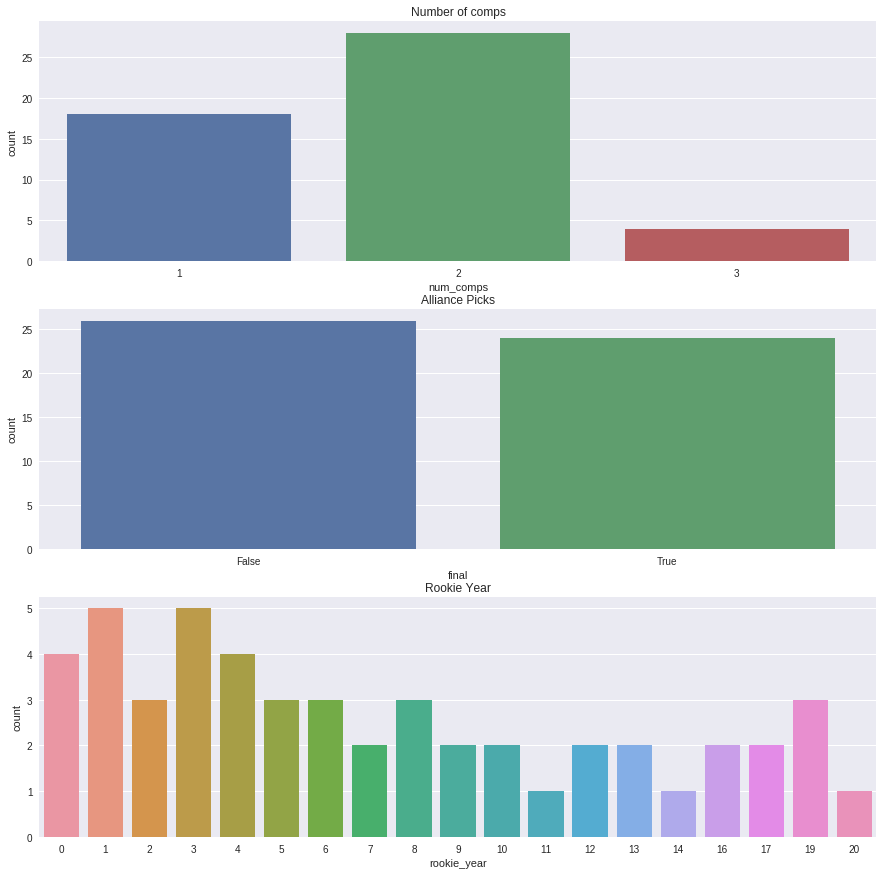

In [16]:
#ax = plt.axes()

f, axarr = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='num_comps', data=alabama_data, ax=axarr[0])
sns.countplot(x='final', data=alabama_data, ax=axarr[1])
sns.countplot(x='rookie_year', data=alabama_data, ax=axarr[2])


axarr[0].set_title('Number of comps')
axarr[1].set_title('Alliance Picks')
axarr[2].set_title('Rookie Year')



#plt.tight_layout()
plt.show()

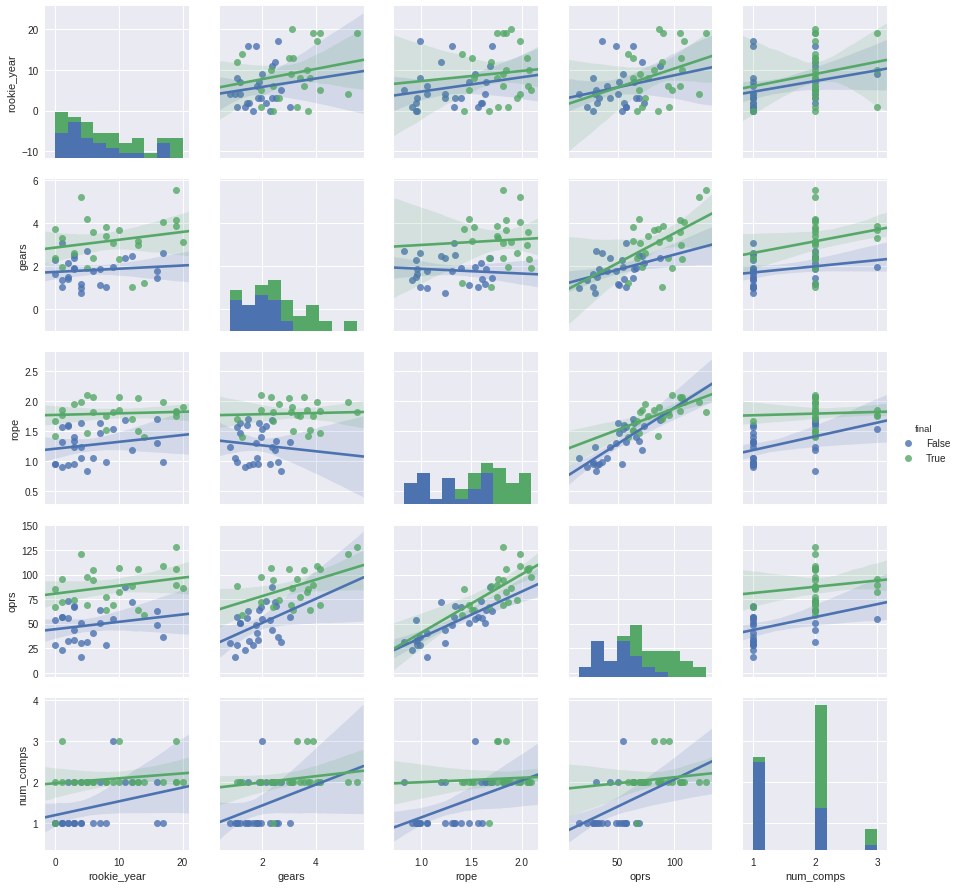

In [17]:
sns.pairplot(alabama_data, vars=['rookie_year', 'gears', 'rope', 'oprs', 'num_comps'], hue='final', kind="reg")
plt.show()

In [18]:
all_data = data.append(alabama_data)

In [19]:
all_data

,rookie_year,team_number,ccwms,dprs,oprs,final,num_comps,gears,rope
key,,,,,,,,,
frc108,22,108,34.406191,54.900779,89.306969,True,2,2.857260,1.790512
frc1287,13,1287,24.375298,73.834942,98.210240,True,2,2.328522,2.059382
frc1466,13,1466,40.304779,59.590579,99.895359,True,2,3.008531,1.936805
frc1876,11,1876,60.811768,46.726476,107.538244,True,2,3.334700,1.746903
frc2393,9,2393,49.066346,53.051534,102.117880,True,2,4.946336,1.708704
frc2641,9,2641,57.021615,62.871190,119.892805,True,3,3.637548,1.941543
frc279,18,279,-3.062326,88.030324,84.967998,False,2,2.999452,1.761172
frc3000,8,3000,18.013532,87.087084,105.100616,True,1,4.286491,1.899947
frc3140,7,3140,1.594756,105.563825,107.158582,True,2,2.276788,2.003893


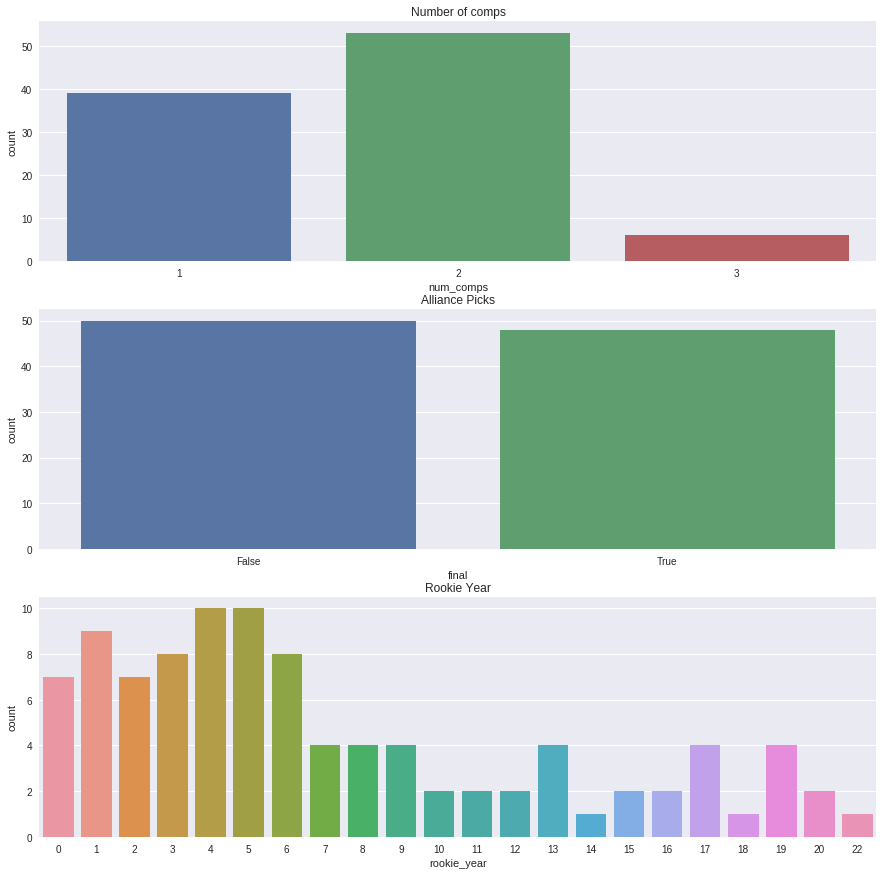

In [20]:
#ax = plt.axes()

f, axarr = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='num_comps', data=all_data, ax=axarr[0])
sns.countplot(x='final', data=all_data, ax=axarr[1])
sns.countplot(x='rookie_year', data=all_data, ax=axarr[2])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Alliance Picks')
axarr[2].set_title('Rookie Year')

#plt.tight_layout()
plt.show()

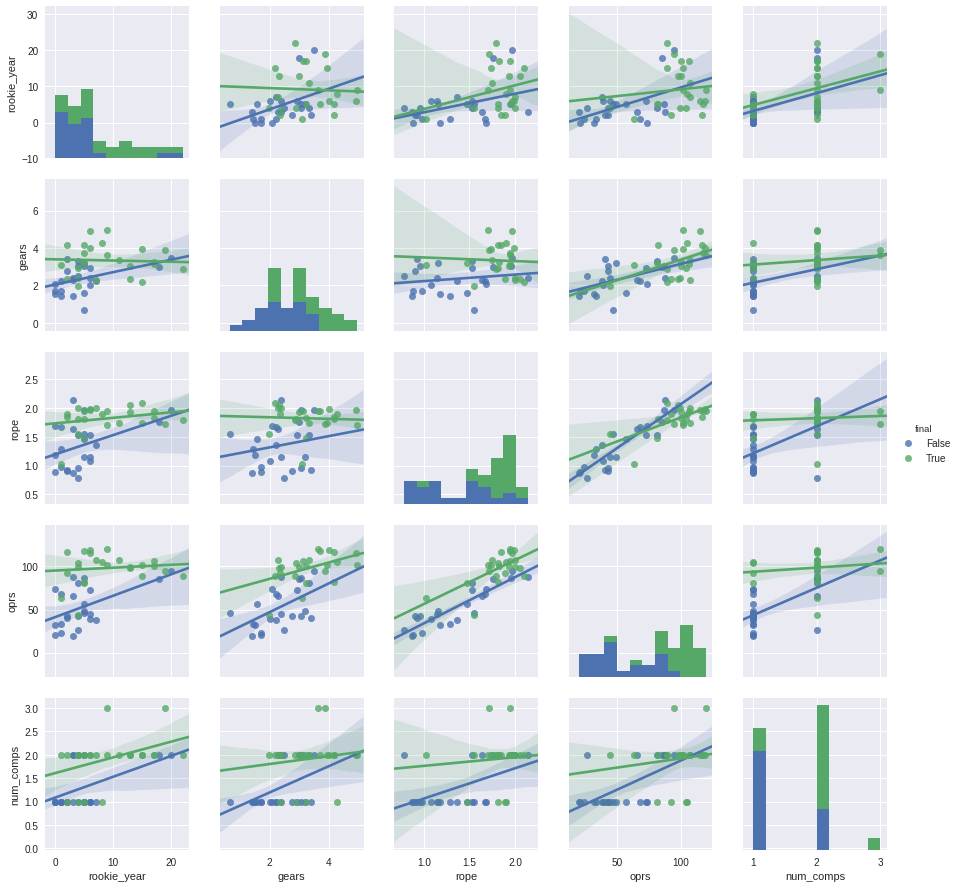

In [21]:
sns.pairplot(data, vars=['rookie_year', 'gears', 'rope', 'oprs', 'num_comps'], hue='final', kind="reg")
plt.show()

In [35]:
target = all_data['final'].copy()
data_p = all_data.drop('final', axis=1).copy()
data_p.drop('oprs', axis=1, inplace=True)
data_p.drop('dprs', axis=1, inplace=True)
data_p.drop('ccwms', axis=1, inplace=True)

In [36]:
data_s = data_p[80+1:]
data_p = data_p[:80]
target_s = target[80+1:]
target = target[:80]

In [37]:
model = RandomForestClassifier()
model = model.fit(data_p, target)
model.score(data_s, target_s)

0.88235294117647056

In [38]:
print(model.feature_importances_)
data_p

[ 0.08084401  0.19147455  0.07405961  0.25952897  0.39409286]


,rookie_year,team_number,num_comps,gears,rope
key,,,,,
frc108,22,108,2,2.857260,1.790512
frc1287,13,1287,2,2.328522,2.059382
frc1466,13,1466,2,3.008531,1.936805
frc1876,11,1876,2,3.334700,1.746903
frc2393,9,2393,2,4.946336,1.708704
frc2641,9,2641,3,3.637548,1.941543
frc279,18,279,2,2.999452,1.761172
frc3000,8,3000,1,4.286491,1.899947
frc3140,7,3140,2,2.276788,2.003893


In [ ]:
model.predict([[5, 4924, 1, 2.4, 1.3]])